# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**


* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины. Правила переноса дедлайнов определены в презентации с первого занятия.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Задачи 1 и 2 сдаются в систему Яндекс.Контест. Ссылка на контест в телеграм-боте.


**Сдача задачи 3:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 10 баллов
* Задача 2 &mdash; 10 баллов
* Задача 3 &mdash; 80 баллов


Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 2.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 3.

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.

На дополнительном занятии 10 февраля будет показан простой пример работы с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных обучить несколько классификаторов для определения выживших, иначе говоря, получить некоторые приближенные правила определения, выжил пассажир или нет, а также сравнить эти правила по качеству приближения.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

Размер train.csv = 61.19 kB; размер test.csv = 28.63 kB. Так как в train больше данных, то дальше для работы будем использовать только train датасет и будем делить его на 2 части.

In [14]:
df = pd.read_csv("train.csv", index_col = False, header = 0)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

Будем использовать для разделения train_test_split из sklearn. Поэтому нам необходимо разделить данные на X (features) и Y (target)

In [16]:
from sklearn.model_selection import train_test_split

Y = df['Survived']
X = df.drop(columns=['Survived'])

train_data, test_data, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print('train part size is', len(train_data))
print('test part size is', len(test_data))

train part size is 623
test part size is 268


Так как дальше нам необходимо применить функцию get_features_and_target к датафрейму, то соберем данные обратно

In [17]:
train_data.insert(1, 'Survived', Y_train.tolist(), True)
test_data.insert(1, 'Survived', Y_test.tolist(), True)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
650,651,0,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.8958,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
450,451,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S
314,315,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S


Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [18]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [19]:
train_features, train_target = get_features_and_target(train_data)
test_features, test_target = get_features_and_target(test_data)

print('train features part size is', len(train_features))
print('train target part size is', len(train_target))

print('test features part size is', len(test_features))
print('test target part size is', len(test_target))

train features part size is 623
train target part size is 623
test features part size is 268
test target part size is 268


для 3-его пункта(knn) посмотрим в каком форммате у нас будут target-ы. Так как нам в таком формате надо будет выводить ответ

In [20]:
train_target.head()

445    1
650    0
172    1
450    0
314    0
Name: Survived, dtype: int64

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков.*

Посмотрим, процентное соотнощение между погибшими в катастрофе и выжившыми:

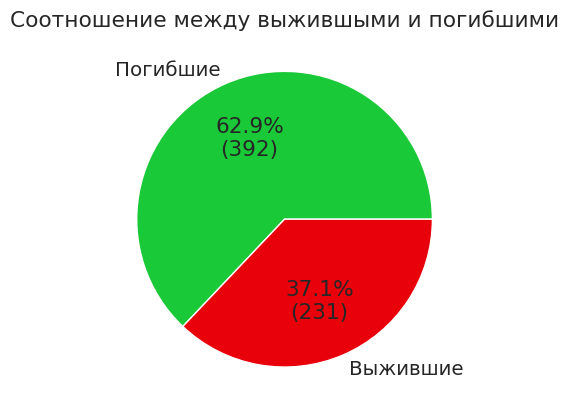

In [13]:
labels = ['Погибшие', 'Выжившие']
surv = train_target.sum()
dead = len(train_target) - surv

def autopct_format(values):  # function from stackoverflow to show percentage
  def my_format(pct):
    total = sum(values)
    val = int(round(pct*total/100.0))
    return '{:.1f}%\n({v:d})'.format(pct, v=val)
  return my_format

colors = sns.color_palette('bright')[2:4]
plt.pie([dead, surv], labels = labels, colors = colors, autopct=autopct_format([dead, surv]))
plt.title('Соотношение между выжившыми и погибшими')

plt.show()

Далее посмотрим на зависимость целевых значений от значений признаков(тех 6 признаков, которые нас попросили выделить: 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'):

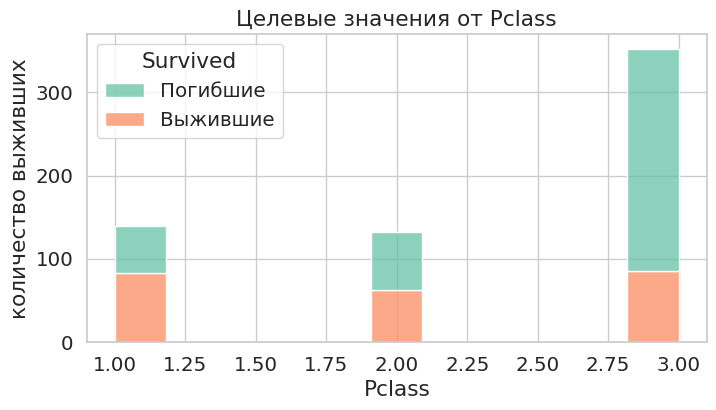

In [41]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(8, 4))
    hist = sns.histplot(data=train_data, x='Pclass', hue='Survived', multiple="stack")

    leg = hist.get_legend()
    leg.texts[0].set_text("Погибшие")
    leg.texts[1].set_text("Выжившие")

    plt.title('Целевые значения от Pclass')
    plt.xlabel('Pclass')
    plt.ylabel('количество выживших')

Таким образом видно, что шанс выжить был сильно больше у пассажиров 1ого и 2ого класса. Это объясняется тем, что у них в среднем каюты находились выше, и они быстрее добирались до палубы со шлюпками

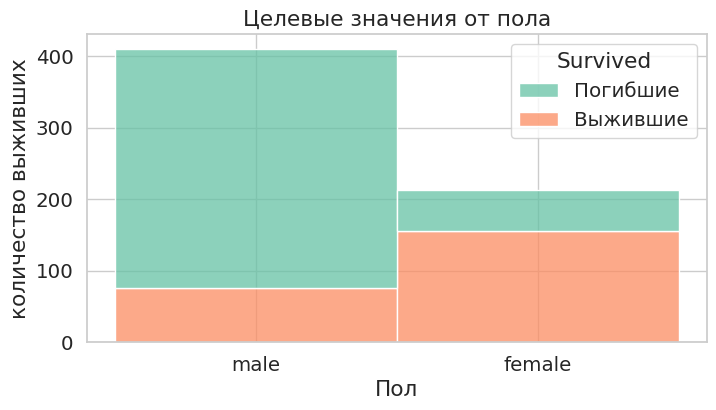

In [42]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(8, 4))
    hist = sns.histplot(data=train_data, x='Sex', hue='Survived', multiple="stack")

    leg = hist.get_legend()
    leg.texts[0].set_text("Погибшие")
    leg.texts[1].set_text("Выжившие")

    plt.title('Целевые значения от пола')
    plt.xlabel('Пол')
    plt.ylabel('количество выживших')

Если посмотреть не на количество погибших, а на процентное соотношение, то можно заметить, что процент выжившых женщин сильно больше, чем процент выживших мужчин(поэтому используем этот признак в решающем дереве)

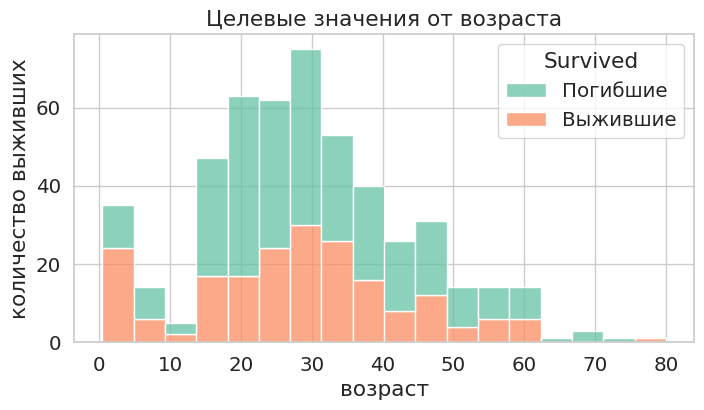

In [43]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(8, 4))
    hist = sns.histplot(data=train_data, x='Age', hue='Survived', multiple="stack")

    leg = hist.get_legend()
    leg.texts[0].set_text("Погибшие")
    leg.texts[1].set_text("Выжившие")

    plt.title('Целевые значения от возраста')
    plt.xlabel('возраст')
    plt.ylabel('количество выживших')

Можно заметить, что выживших в процентном соотношении сильно больше в возрасте до 15 лет. Дальше мы видим, что количество людей в возрасте от 15 до 40 сильно большея, но при этом в процентном соотношении выживших становится меньше. А большее количество объясняется тем, что это интервал, покрывающий медианное значение человеческого возраста

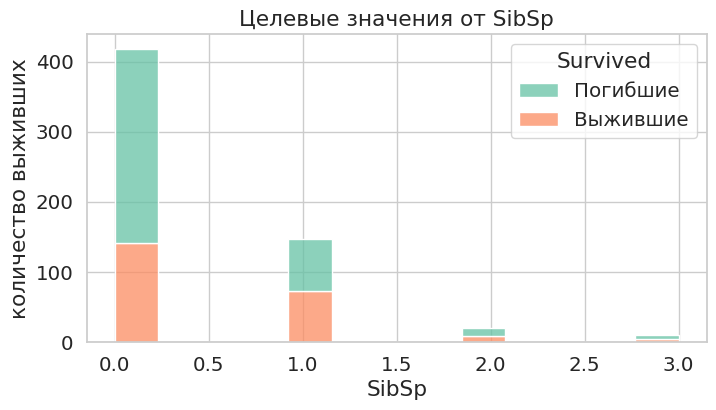

In [44]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(8, 4))
    hist = sns.histplot(data=train_data[train_data['SibSp'] < 4], x='SibSp', hue='Survived', multiple="stack")

    leg = hist.get_legend()
    leg.texts[0].set_text("Погибшие")
    leg.texts[1].set_text("Выжившие")

    plt.title('Целевые значения от SibSp')
    plt.xlabel('SibSp')
    plt.ylabel('количество выживших')

При значениях переменной 'SibSp' больше 3 количество выживших очень маленькое, поэтому эти значения были убраны для большей информативности гистограммы. Количество таких людей мало, так как не очень много, кто ездит в круизы такими большими семьями

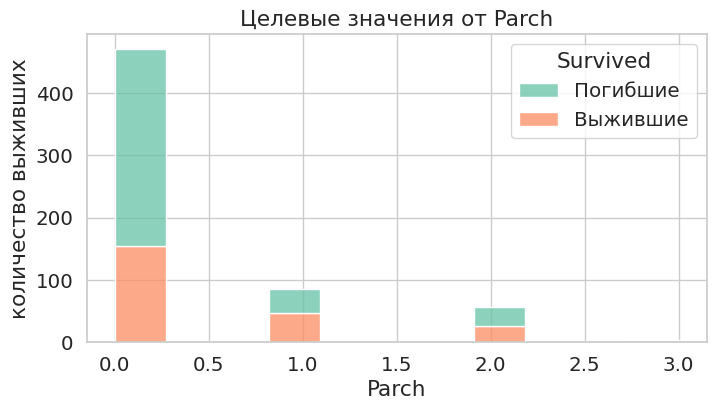

In [45]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(8, 4))
    hist = sns.histplot(data=train_data[train_data['Parch'] < 4], x='Parch', hue='Survived', multiple="stack")

    leg = hist.get_legend()
    leg.texts[0].set_text("Погибшие")
    leg.texts[1].set_text("Выжившие")

    plt.title('Целевые значения от Parch')
    plt.xlabel('Parch')
    plt.ylabel('количество выживших')

При изначальном построении диаграммы целевые значения сильно падали при значениях от 3, поэтому для большей информативности они были вырезаны

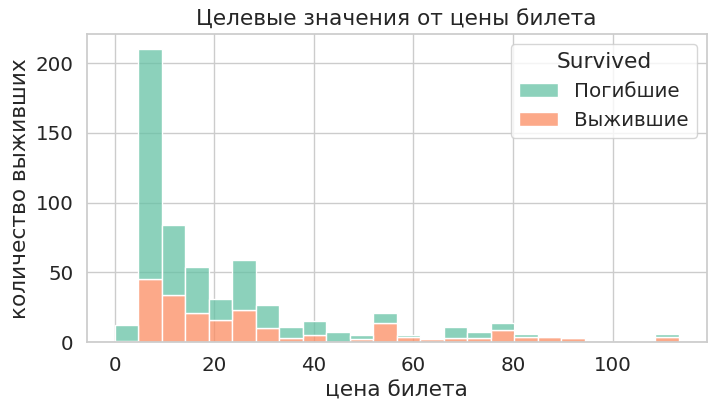

In [46]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(8, 4))
    hist = sns.histplot(data=train_data[train_data['Fare'] < 120], x='Fare', hue='Survived', multiple="stack")

    leg = hist.get_legend()
    leg.texts[0].set_text("Погибшие")
    leg.texts[1].set_text("Выжившие")

    plt.title('Целевые значения от цены билета')
    plt.xlabel('цена билета')
    plt.ylabel('количество выживших')

Так как людей, купивших дорогие билеты минимальное количество, то уберем их для большей информативности гистограммы

Так же построим для решающего дерева глубиной 2 гистограмму, чтобы показать, что она достаточно неплохо характеризует разделение на 2 класса

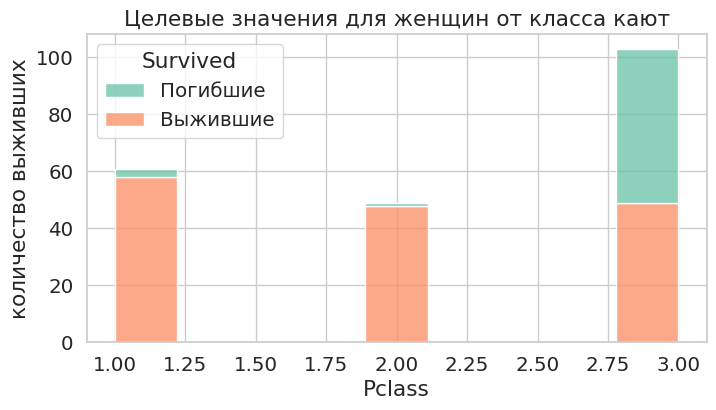

In [47]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(8, 4))
    hist = sns.histplot(data=train_data[train_data['Sex'] == 'female'], x='Pclass', hue='Survived', multiple="stack")

    leg = hist.get_legend()
    leg.texts[0].set_text("Погибшие")
    leg.texts[1].set_text("Выжившие")

    plt.title('Целевые значения для женщин от класса кают')
    plt.xlabel('Pclass')
    plt.ylabel('количество выживших')

Таким образом помимо того, что в процентном соотношении женщин выжило больше(см выше), если женщина была в 1ом или 2ом классе, то можно считать, что она выжила. Теперь построим такую диаграмму для мужчин

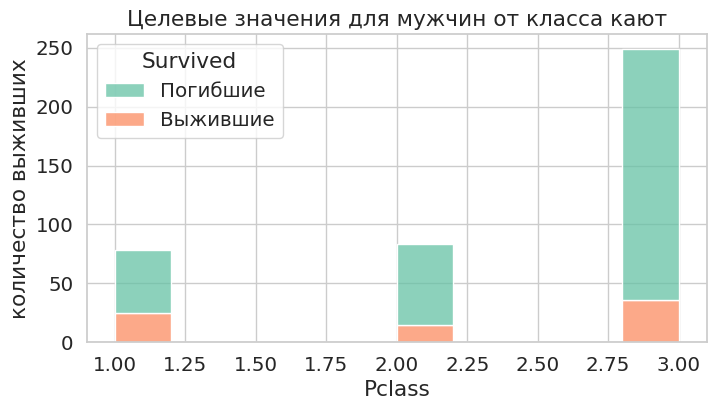

In [48]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(8, 4))
    hist = sns.histplot(data=train_data[train_data['Sex'] == 'male'], x='Pclass', hue='Survived', multiple="stack")

    leg = hist.get_legend()
    leg.texts[0].set_text("Погибшие")
    leg.texts[1].set_text("Выжившие")

    plt.title('Целевые значения для мужчин от класса кают')
    plt.xlabel('Pclass')
    plt.ylabel('количество выживших')

У мужчин выше всего процент выживших в первом классе. Для остальных классов можно считать погибшими

Теперь посмотрим, связаны ли как-то между собой признаки, по которым мы будем делить людей на 2 класса(погибшие и выжившие соответственно). Для того, чтобы избежать построения графиков для каждой пары величин, постороим еще диагональную матрицу корреляций для численных признаков

<Axes: >

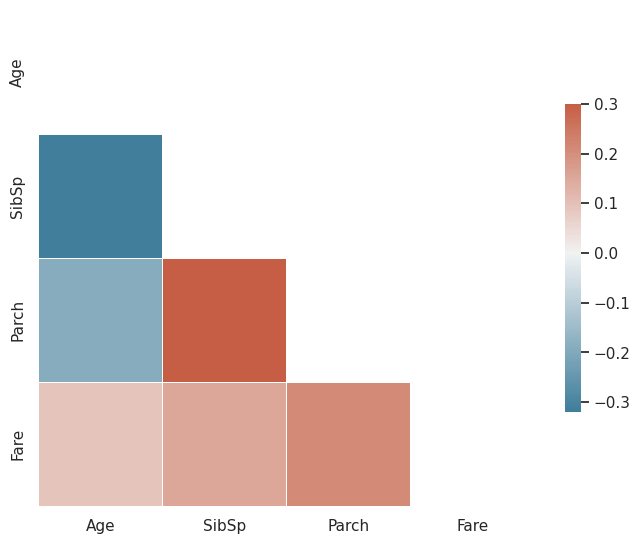

In [ ]:
sns.set_theme(style="white")   # from https://seaborn.pydata.org/examples/many_pairwise_correlations.html tutorial

columns = ['Age', 'SibSp', 'Parch', 'Fare']
d = train_data[columns]
corr = d.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Из рисунка видно, что сильнее всего связаны пара Parch и SibSp (около 0.3) и пара Age и SibSp (около -0.3). То есть все значения далеки от 1 или -1. Плэтому можно сказать, что признаки, которые было предложено оставить, слабо зависят друг от друга

#### 3. Классификация методом ближайшего соседа

Ранее в контесте вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи.

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [21]:
def predict_class_for_one(features, train_features, train_target, k=1):  # predict class(survived or not) for one passanger
  min_squared_dists = []
  for index, train_row in train_features.iterrows():
    curr_squared_distance = 0
    for column_name in train_features:
      dist_per_column = features[column_name] - train_row[column_name]
      curr_squared_distance = curr_squared_distance + dist_per_column * dist_per_column
    min_squared_dists.append((curr_squared_distance, train_target[index]))

  min_squared_dists = sorted(min_squared_dists, key=lambda x: x[0])
  min_squared_dists = min_squared_dists[0:k+1]
  min_squared_dists = [class_val for (dist, class_val) in min_squared_dists]
  predicted_class = np.bincount(min_squared_dists).argmax()

  return predicted_class

def knn(features, train_features, train_target, k=1):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    на основе обучающего набора данных train_features, train_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    '''
    predicted_list = []
    indexes = []
    for index, row in features.iterrows():
      indexes.append(index)
      predicted_class = predict_class_for_one(row, train_features, train_target, k)
      predicted_list.append(predicted_class)

    predicted = pd.Series(predicted_list, index=indexes)
    return predicted

Постройте классификатор методом ближайшего соседа, используя только признаки `Age` и `Fare`.

Какую метрику (функцию расстояния) вы при этом используете? Нужно ли предварительно что-то сделать с признаками?

Так как в задании 2 предлагалось использовать евклидово расстояние, то будем использовать его(кажется, что оно наилучшим образом показывает расстояние до других точек в R^d). Попробуем сделать классификацию с ненормированными признаками, но заполним значения с Nan-ами средниими для увеличения точности:

In [22]:
features_columns = ['Age', 'Fare']    # drop all features without Age and Fare

train_features_knn = train_features[features_columns]
test_features_knn = test_features[features_columns]

# now we replace Nan with mean values
age_mean = train_features_knn['Age'].mean()
train_features_knn['Age'] = train_features_knn['Age'].fillna(age_mean)
fare_mean = train_features_knn['Fare'].mean()
train_features_knn['Fare'] = train_features_knn['Fare'].fillna(fare_mean)

age_mean = test_features_knn['Age'].mean()
test_features_knn['Age'] = test_features_knn['Age'].fillna(age_mean)
fare_mean = test_features_knn['Fare'].mean()
test_features_knn['Fare'] = test_features_knn['Fare'].fillna(fare_mean)

<ipython-input-22-c498ca4695dd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features_knn['Age'] = train_features_knn['Age'].fillna(age_mean)
<ipython-input-22-c498ca4695dd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features_knn['Fare'] = train_features_knn['Fare'].fillna(fare_mean)
<ipython-input-22-c498ca4695dd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [23]:
predicted = knn(test_features_knn, train_features_knn, train_target, 3)

Посмотрим в скольких пунктах результаты совпадают:

In [24]:
cnt_matched = np.sum(predicted.to_numpy() == test_target.to_numpy())
print('Quantity of matched answers: ', cnt_matched)
print('Accuracy: ', cnt_matched / len(predicted))

Quantity of matched answers:  173
Accuracy:  0.6455223880597015


Заметим, что результат не очень хорошй. К тому же, так как у нас Age и Fare измеряются в абсолютно разных единицах, то необходимо нормализовать данные(Вспомним формулу для нормализации. Тогда заметим, что не имеет раззницы, что делать вначале: заполнять Nan-ы средними значениями или нормализовать)

In [25]:
train_features_knn['Age'] = (train_features_knn['Age'] - train_features_knn['Age'].mean()) / train_features_knn['Age'].std()
train_features_knn['Fare'] = (train_features_knn['Fare'] - train_features_knn['Fare'].mean()) / train_features_knn['Fare'].std()

test_features_knn['Age'] = (test_features_knn['Age'] - test_features_knn['Age'].mean()) / test_features_knn['Age'].std()
test_features_knn['Fare'] = (test_features_knn['Fare'] - test_features_knn['Fare'].mean()) / test_features_knn['Fare'].std()

<ipython-input-25-843cfdacd3b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features_knn['Age'] = (train_features_knn['Age'] - train_features_knn['Age'].mean()) / train_features_knn['Age'].std()
<ipython-input-25-843cfdacd3b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features_knn['Fare'] = (train_features_knn['Fare'] - train_features_knn['Fare'].mean()) / train_features_knn['Fare'].std()
<ipython-input-25-843cfdacd3b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a cop

Повторим все то же самое для нормированных данных:

In [26]:
predicted = knn(test_features_knn, train_features_knn, train_target, 3)

cnt_matched = np.sum(predicted.to_numpy() == test_target.to_numpy())
print('Quantity of matched answers: ', cnt_matched)
print('Accuracy: ', cnt_matched / len(predicted))

Quantity of matched answers:  187
Accuracy:  0.6977611940298507


Как меняется результат классификации при другом количестве соседей? Рассмотрите хотя бы три различных нечетных значения количества соседей.

In [27]:
# if k = 5

predicted = knn(test_features_knn, train_features_knn, train_target, 5)

cnt_matched = np.sum(predicted.to_numpy() == test_target.to_numpy())
print('Quantity of matched answers: ', cnt_matched)
print('Accuracy: ', cnt_matched / len(predicted))

Quantity of matched answers:  186
Accuracy:  0.6940298507462687


In [28]:
# if k = 7

predicted = knn(test_features_knn, train_features_knn, train_target, 7)

cnt_matched = np.sum(predicted.to_numpy() == test_target.to_numpy())
print('Quantity of matched answers: ', cnt_matched)
print('Accuracy: ', cnt_matched / len(predicted))

Quantity of matched answers:  185
Accuracy:  0.6902985074626866


In [29]:
# if k = 9

predicted = knn(test_features_knn, train_features_knn, train_target, 9)

cnt_matched = np.sum(predicted.to_numpy() == test_target.to_numpy())
print('Quantity of matched answers: ', cnt_matched)
print('Accuracy: ', cnt_matched / len(predicted))

Quantity of matched answers:  181
Accuracy:  0.6753731343283582


In [30]:
# if k = 11

predicted = knn(test_features_knn, train_features_knn, train_target, 11)

cnt_matched = np.sum(predicted.to_numpy() == test_target.to_numpy())
print('Quantity of matched answers: ', cnt_matched)
print('Accuracy: ', cnt_matched / len(predicted))

Quantity of matched answers:  180
Accuracy:  0.6716417910447762


Таким образом оптимальная точность получается при n = 3, а дальше при увеличении n точность падает

Как можно было бы учесть другие признаки? Какие при этом могут возникнуть проблемы?

Можно учесть и отнормировать другие численные признаки по типу цены за билет(но мы их выкинули в 1ом пункте из рассмторения). Также можно учесть и категориальные признаки(Наприер класс билета и пол) и закодируем их. Чтобы не добавлять новые неправильные зависимости будем кодировать не числами от 0 до какого-то n, а использовать One Hot Encoding.\
Но при их добавлении могут возникнуть некторые проблемы. Так класс билета и пол - дискретные и ограниченные величины. То есть эти величины не непрерывные, а потому количество людей в каждом классе имеет значение. А нас скорей интересует процентное соотношнение, чтобы судить о выживших. Также для ниих расстояния между значениями будут большими, что так же будет отдалять точки.
Строить классификатор с другими признаками при этом не нужно.

#### 4. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

Заметим, что в процентном соотношении женщины выживали чаще мужчин. При это женщины, размещенные в 1 и 2 классе выживали заметно чаще. Таким образом для дерева глубиной 2 мы можем построить более менее разумную модель классификации. Поэтому возьмем такие признаки

**Дерево 2:**

Заметим, что если рассматривать возраст людей, то и мужчины, и женщины выживали реже, если их возраст был от 15 до 40. Что логично, так как они находились в своем расцвете сил, и им проще было удержаться на поверзности воды, пока их не подобрали

Реализуйте полученные деревья по шаблону

In [31]:
def tree1(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    first_condition = (features['Sex'] == 'female')
    predicted = ((features['Pclass'] == '1') | first_condition)

    return predicted

In [32]:
def tree2(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    predicted = ((features['Age'] <= 20.0) & (features['Age'] >= 40.0))

    return predicted

#### 5. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

Логично посмотреть не только на количество совпадений с ответом, но и сравнить это количество с количесством человек в тестовой выборке(для скольких всего мы предсказывали). Тогда логично представить эти сравнения в виде процентного соотношения (сколько ответов совпадет из всей тестовой выборки). Таким образом за критерий возьмем точность (Accuracy). В условии сказано не использовать стандартные критерии по типу Recall, f1 skore и тд. Поэтому остановимся на Accuracy

Реализуйте данный критерий по шаблону

In [33]:
def criteria(target, predicted):
    '''
    Вычисление критерия качества для предсказания predicted,
    если истинные значения -- target.
    Возвращает одно вещественное число.
    '''
    cnt_matched = np.sum(predicted.to_numpy() == test_target.to_numpy())
    return (cnt_matched / len(predicted))

Оцените качество построенных ранее моделей (два дерева, kNN), используя предложенный критерий.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

Посчитаем еще раз Accuracy для knn с n = 3(оптимальное значение)

In [34]:
predicted = knn(test_features_knn, train_features_knn, train_target, 3)

criteria(test_target, predicted)

0.6977611940298507

В исходном датафрейме много Nan-ов в нужных нам позициях для решающих деревьев. Заменим в категориальных признаках их на самое частое значение, а в численных на среднее значение. Нас интересуют Age, Sex, Pclass

In [35]:
columns = ['Age', 'Sex', 'Pclass']

In [36]:
train_features_tree = train_features[columns]
test_features_tree = test_features[columns]

# now we replace Nan with mean values and normalize them
age_mean = train_features_tree['Age'].mean()
train_features_tree['Age'] = train_features_tree['Age'].fillna(age_mean)
train_features_tree['Age']=(train_features_tree['Age'] - train_features_tree['Age'].mean()) / train_features_tree['Age'].std()

age_mean = test_features_tree['Age'].mean()
test_features_tree['Age'] = test_features_tree['Age'].fillna(age_mean)
test_features_tree['Age']=(test_features_tree['Age'] - test_features_tree['Age'].mean()) / test_features_tree['Age'].std()

# now we replace Nan with mean most frequent values
# most_freq = train_features_tree['Sex'].value_counts().argmax()
most_freq = train_features_tree['Sex'].value_counts().idxmax()
train_features_tree['Sex'] = train_features_tree['Sex'].fillna(most_freq)
most_freq = train_features_tree['Pclass'].value_counts().idxmax()
train_features_tree['Pclass'] = train_features_tree['Pclass'].fillna(most_freq)

most_freq = test_features_tree['Sex'].value_counts().idxmax()
test_features_tree['Sex'] = test_features_tree['Sex'].fillna(most_freq)
most_freq = test_features_tree['Pclass'].value_counts().idxmax()
test_features_tree['Pclass'] = test_features_tree['Pclass'].fillna(most_freq)

<ipython-input-36-72a5ccc62963>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features_tree['Age'] = train_features_tree['Age'].fillna(age_mean)
<ipython-input-36-72a5ccc62963>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features_tree['Age']=(train_features_tree['Age'] - train_features_tree['Age'].mean()) / train_features_tree['Age'].std()
<ipython-input-36-72a5ccc62963>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

Посчитаем Accuracy для первого дерева

In [37]:
predicted = tree1(test_features)

criteria(test_target, predicted)

0.7910447761194029

Посчитаем Accuracy для второго дерева

In [38]:
predicted = tree2(test_features)

criteria(test_target, predicted)

0.585820895522388

Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

In [39]:
accuracy_arr = []
k_values = []

for k in range(1, 11):
  predicted = knn(test_features_knn, train_features_knn, train_target, k)
  curr_accuracy = criteria(test_target, predicted)
  accuracy_arr.append(curr_accuracy)
  k_values.append(k)
  print(k, 'accuracy: ', curr_accuracy)

1 accuracy:  0.6492537313432836
2 accuracy:  0.6977611940298507
3 accuracy:  0.6977611940298507
4 accuracy:  0.7052238805970149
5 accuracy:  0.6940298507462687
6 accuracy:  0.6977611940298507
7 accuracy:  0.6902985074626866
8 accuracy:  0.7014925373134329
9 accuracy:  0.6753731343283582
10 accuracy:  0.6865671641791045


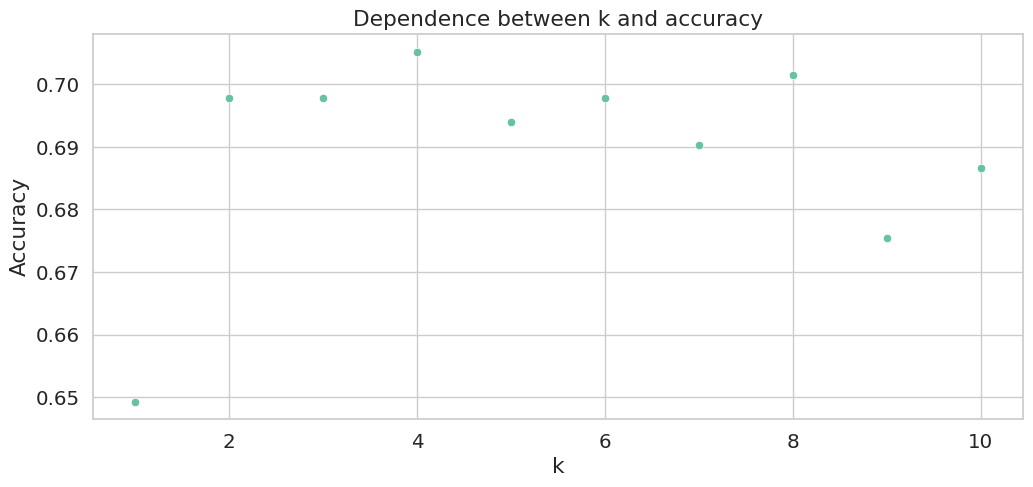

In [40]:
with sns.axes_style('whitegrid'):
  plt.figure(figsize=(12, 5))
  hist = sns.scatterplot(x = k_values, y = accuracy_arr)
  plt.ylabel('Accuracy')
  plt.xlabel('k')
  plt.title('Dependence between k and accuracy')

По графику видно, что с увеличением k точность в среднем падает. Так как пр большом количестве соседей мы берем достаточно далекие друг от друга точки, то качество нашего предсказания уменьшается(в целом большинство людей на титанике погибло. Поэтому при большом количестве соседей, мы скорее скажем, что пассажир погиб. Хотя в общем, это не обязательно правда).\
Наибольшая точность достигается как раз при k = 4.\
Точность при 1 заметно меньше, чем при других k. Это связано с тем, что только 1 ближайший сосед - плохой показатель для ответа(например это может быть шум из-за того, что в датасете много Nan-ов)

#### 6. Выводы

1) Для предложенного датасета мы отобрали признаки, которые нас попросили в задании, и исследовали, какие из них лучше показывают выжил пассажир или нет. Такими являются пол(женщин в процентном соотношении выжило сильно больше мужчин), класс каюты(1ый класс для мужчин и 1-ый и 2ой для женщин показывают лучшую "выживаемость"), возраст(детей в возрасте до 15 лет осталось в живых сильно больше в процентнои соотношении)\
2) Мы построили модель knn для классификации и попытались предсказать выживет пассажир или нет. Так же заметили, что на нормализованных данных результаты лучше. Также подобрали оптимальное значение k для лучшей точности\
3) На основании пункта 1 построили два разных дерева для классификации. Причем для дерева глубиной 2 попытались выбрать наиболее подходящие признаки, чтобы увеличить точность\
4) Сравнивая между собой 2 модели можно заметить, что knn работает лучше. К тому же для решающего дерева такой маленькой глубины при изменении данных (например если взять файлик 'test.csv') результаты будут сильно другие. Так как в этом случае все зависит от закономернстей, найденных вручную. knn же можно приспособить и к другим данным, при этом саму функцию менять не придется